In [1]:
from google.colab import output
output.enable_custom_widget_manager()

In [2]:
!rm -rf ./.git
!git clone https://github.com/thaddavis/intro-to-pytorch temp_repo
!mv temp_repo/* temp_repo/.[^.]* ./
!rm -rf temp_repo

Cloning into 'temp_repo'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 122 (delta 73), reused 87 (delta 38), pack-reused 0
Receiving objects: 100% (122/122), 27.24 KiB | 715.00 KiB/s, done.
Resolving deltas: 100% (73/73), done.


In [3]:
import matplotlib.pyplot as plt
from draw_neural_network import draw_neural_net

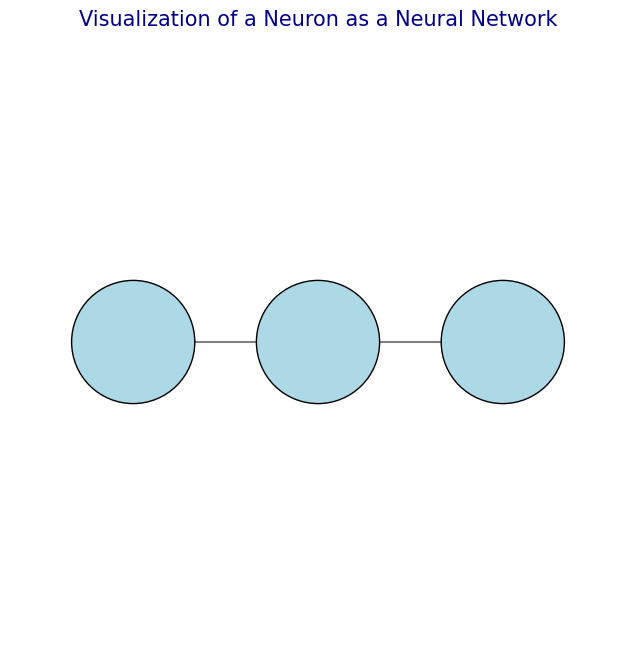

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.set_aspect('equal')
ax.axis('off')
draw_neural_net(ax, .2, .8, .1, .9, [1, 1, 1])
plt.title("Visualization of a Neuron as a Neural Network", fontsize=15, color='darkblue')
plt.show()

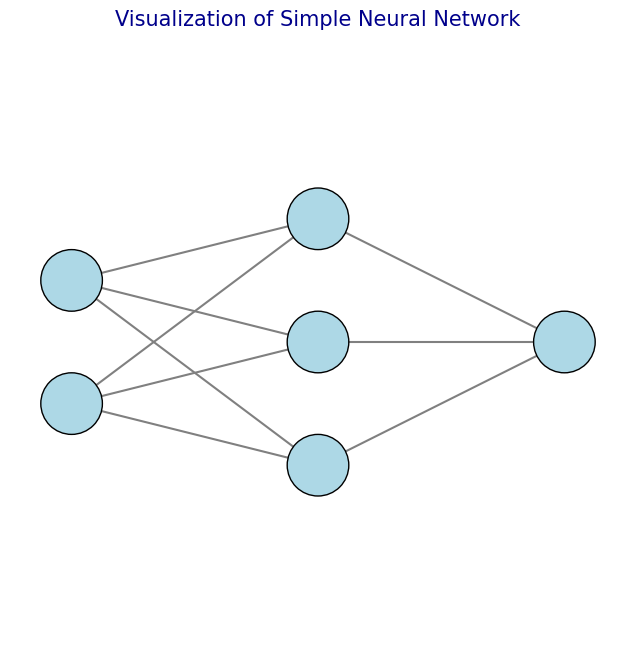

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.set_aspect('equal')
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 3, 1])
plt.title("Visualization of Simple Neural Network", fontsize=15, color='darkblue')
plt.show()

# 1. Initializing a simple neural network

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.input_layer = nn.Linear(2, 3)
        self.layer_1 = nn.Linear(3, 1)
        # Sigmoid function for output
        self.sigmoid = nn.Sigmoid()

        # Initialize weights to 0
        self._initialize_weights()

    def _initialize_weights(self):
        nn.init.constant_(self.input_layer.weight, 0)
        nn.init.constant_(self.input_layer.bias, 0)
        nn.init.constant_(self.layer_1.weight, 0)
        nn.init.constant_(self.layer_1.bias, 0)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        x = self.layer_1(x)
        x = self.sigmoid(x)
        return x

# Initialize the neural network
model = SimpleNN()

# 2. Testing out the neural network before training

In [7]:
# Validation set

# Tad [70, 180] => label: 0
# Michael Chang [73, 175] => label: 0
# Meryl Streep [68, 168] => label: 0
# Tom Hanks [80, 183] => label: 0
# Al Pacino [68, 170] => label: 0

# Kevin Garnett [109,211] label: 1
# Allen Iverson [75,183] label: 1
# Dwayne Wade [100, 193] label: 1
# Gilbert Arenas [95, 193] label: 1
# Stephen Curry [84, 188] label: 1

# Make a prediction given a person's weight (kg) and height (cm)
new_person = torch.tensor([[84, 188]], dtype=torch.float32)
prediction = model(new_person)
print(f'Prediction: {prediction.item():.4f}')

Prediction: 0.5000


 ## **Results before training**

### Non-NBA individuals

- Tad => X
- Michael Chang => X
- Meryl Streep => X
- Tom Hanks => X
- Al Pacino => X

Accuracy: 0% (0/5)

### NBA players

- Kevin Garnett => √
- Allen Iverson => √
- Dwayne Wade => √
- Gilbert Arenas => √
- Stephen Curry => √

Accuracy: 100% (5/5)

### Overall

Accuracy: 50% (5/10)

# 3. Now let's train the neural network

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.input_layer = nn.Linear(2, 3)
        self.layer_1 = nn.Linear(3, 1)
        # Sigmoid function for output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        x = self.layer_1(x)
        x = self.sigmoid(x)
        return x

# Example training data - 10 examples of NBA players and 10 examples of NON-NBA players
# Input data: [weight (kg), height (cm)]
inputs = torch.tensor([
    [98, 198],  # Michael Jordan
    [113, 206], # LeBron James
    [102, 218], # Kareem Abdul-Jabbar
    [98, 206],  # Magic Johnson
    [100, 206], # Larry Bird
    [125, 216], # Wilt Chamberlain
    [147, 216], # Shaquille O'Neal
    [98, 208],  # Bill Russell
    [113, 211], # Tim Duncan
    [96, 198],  # Kobe Bryant
    [77, 170],  # Tom Cruise
    [82, 188],  # Elon Musk
    [63, 178],  # Taylor Swift
    [53, 165],  # Emma Watson
    [91, 190],  # Chris Hemsworth
    [47, 153],  # Ariana Grande
    [75, 183],  # Leonardo DiCaprio
    [62, 169],  # Beyoncé
    [118, 196], # Dwayne Johnson
    [77, 169]   # Oprah Winfrey
], dtype=torch.float32)

labels = torch.tensor([
    [1],  # Michael Jordan
    [1],  # LeBron James
    [1],  # Kareem Abdul-Jabbar
    [1],  # Magic Johnson
    [1],  # Larry Bird
    [1],  # Wilt Chamberlain
    [1],  # Shaquille O'Neal
    [1],  # Bill Russell
    [1],  # Tim Duncan
    [1],  # Kobe Bryant
    [0],  # Tom Cruise
    [0],  # Elon Musk
    [0],  # Taylor Swift
    [0],  # Emma Watson
    [0],  # Chris Hemsworth
    [0],  # Ariana Grande
    [0],  # Leonardo DiCaprio
    [0],  # Beyoncé
    [0],  # Dwayne Johnson
    [0],  # Oprah Winfrey
], dtype=torch.float32)

# Normalize the input data
mean = inputs.mean(dim=0, keepdim=True)
print('mean', mean)
std = inputs.std(dim=0, keepdim=True)
print('std', std)
inputs = (inputs - mean) / std

# Initialize the neural network
model = SimpleNN()

# Define a loss function and an optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent optimizer

# Training loop
num_epochs = 20000
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass: compute the model output
    outputs = model(inputs)
    # Compute the loss
    loss = criterion(outputs, labels)
    # Backward pass: compute gradients
    loss.backward()
    # Update weights
    optimizer.step()
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Cost: {loss.item():.4f}')

mean tensor([[ 91.7500, 192.2000]])
std tensor([[25.2209, 19.4790]])
Epoch [100/20000], Cost: 0.6811
Epoch [200/20000], Cost: 0.6772
Epoch [300/20000], Cost: 0.6730
Epoch [400/20000], Cost: 0.6688
Epoch [500/20000], Cost: 0.6645
Epoch [600/20000], Cost: 0.6602
Epoch [700/20000], Cost: 0.6557
Epoch [800/20000], Cost: 0.6511
Epoch [900/20000], Cost: 0.6464
Epoch [1000/20000], Cost: 0.6415
Epoch [1100/20000], Cost: 0.6366
Epoch [1200/20000], Cost: 0.6315
Epoch [1300/20000], Cost: 0.6262
Epoch [1400/20000], Cost: 0.6208
Epoch [1500/20000], Cost: 0.6153
Epoch [1600/20000], Cost: 0.6102
Epoch [1700/20000], Cost: 0.6049
Epoch [1800/20000], Cost: 0.5994
Epoch [1900/20000], Cost: 0.5938
Epoch [2000/20000], Cost: 0.5881
Epoch [2100/20000], Cost: 0.5820
Epoch [2200/20000], Cost: 0.5757
Epoch [2300/20000], Cost: 0.5690
Epoch [2400/20000], Cost: 0.5618
Epoch [2500/20000], Cost: 0.5545
Epoch [2600/20000], Cost: 0.5469
Epoch [2700/20000], Cost: 0.5392
Epoch [2800/20000], Cost: 0.5314
Epoch [2900/2000

# 4. Testing out the neural network after training

In [9]:
# Validation set

# Tad [70, 180] => label: 0
# Michael Chang [73, 175] => label: 0
# Meryl Streep [68, 168] => label: 0
# Tom Hanks [80, 183] => label: 0
# Al Pacino [68, 170] => label: 0

# Kevin Garnett [109,211] label: 1
# Allen Iverson [75,183] label: 1
# Dwayne Wade [100, 193] label: 1
# Gilbert Arenas [95, 193] label: 1
# Stephen Curry [84, 188] label: 1

# Make a prediction given a person's weight (kg) and height (cm)
new_person = torch.tensor([[84, 188]], dtype=torch.float32)
new_person = (new_person - mean) / std
prediction = model(new_person)
print(f'Prediction: {prediction.item():.4f}')

Prediction: 0.1065


## **After training**

### Non-NBA individuals

- Tad => √
- Michael Chang => √
- Meryl Streep => √
- Tom Hanks => √
- Al Pacino => √

Accuracy: 100% (5/5)

### NBA players

- Kevin Garnett => √
- Allen Iverson => X
- Dwayne Wade => X
- Gilbert Arenas => X
- Stephen Curry => X

Accuracy: 20% (1/5)

### Overall

Accuracy: 60% (6/10)

# Slight larger neural network

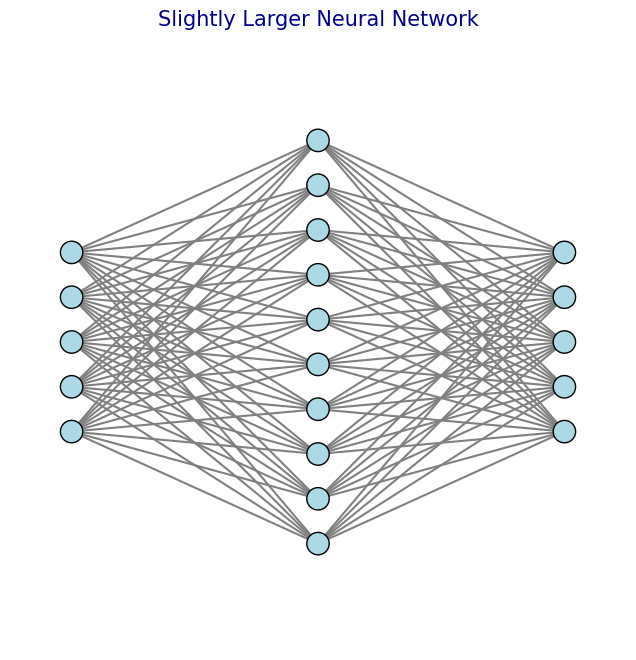

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.set_aspect('equal')
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5, 10, 5])
plt.title("Slightly Larger Neural Network", fontsize=15, color='darkblue')
plt.show()

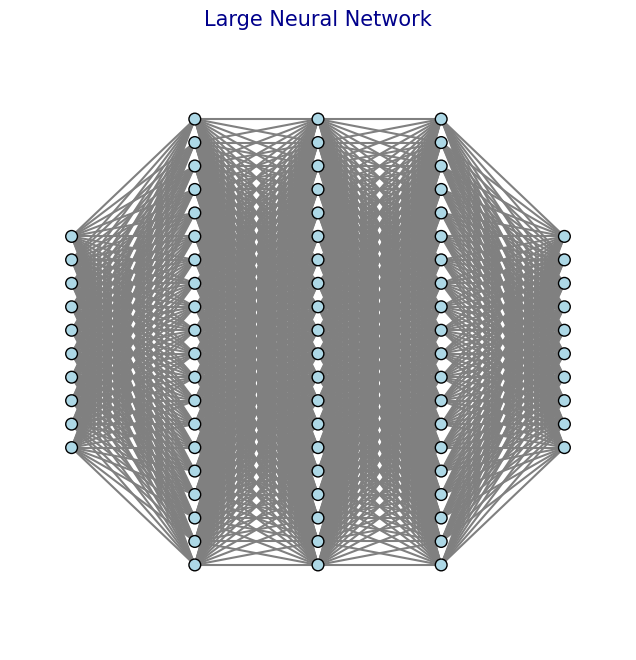

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.set_aspect('equal')
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [10,20,20,20,10])
plt.title("Large Neural Network", fontsize=15, color='darkblue')
plt.show()